# KNN modeling with diabetes dataset

## Library import

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import altair as alt
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## Data Load

In [5]:
df = pd.read_csv("diabetes.csv")

# Exploratory Data Analysis

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

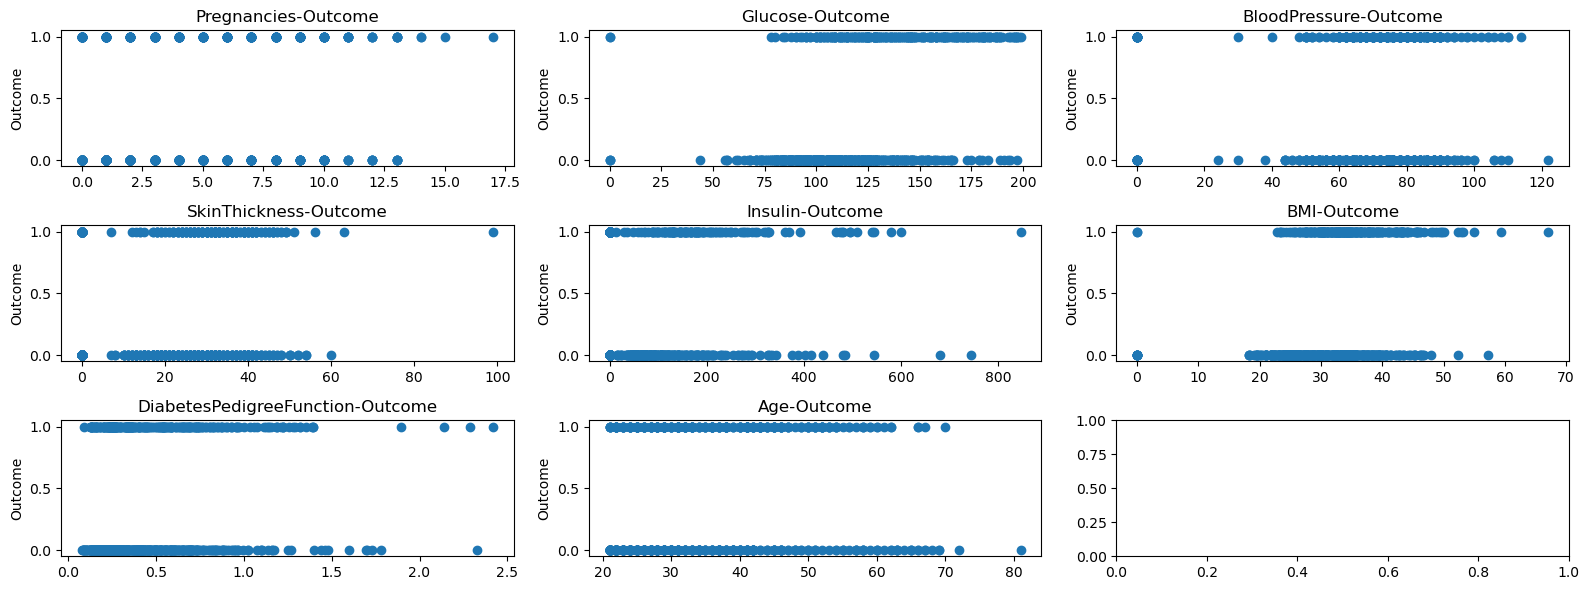

In [16]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(16,6))

axes[0,0].plot(df['Pregnancies'],df['Outcome'],'o')
axes[0,0].set_ylabel("Outcome")

axes[0,1].plot(df['Glucose'],df['Outcome'],'o')
axes[0,1].set_ylabel("Outcome")

axes[0,2].plot(df['BloodPressure'],df['Outcome'],'o')
axes[0,2].set_ylabel("Outcome")

axes[1,0].plot(df['SkinThickness'],df['Outcome'],'o')
axes[1,0].set_ylabel("Outcome")

axes[1,1].plot(df['Insulin'],df['Outcome'],'o')
axes[1,1].set_ylabel("Outcome")

axes[1,2].plot(df['BMI'],df['Outcome'],'o')
axes[1,2].set_ylabel("Outcome")

axes[2,0].plot(df['DiabetesPedigreeFunction'],df['Outcome'],'o')
axes[2,0].set_ylabel("Outcome")

axes[2,1].plot(df['Age'],df['Outcome'],'o')
axes[2,1].set_ylabel("Outcome")
    
axes[0,0].set_title("Pregnancies-Outcome")
axes[0,1].set_title("Glucose-Outcome")
axes[0,2].set_title("BloodPressure-Outcome")
axes[1,0].set_title("SkinThickness-Outcome")
axes[1,1].set_title("Insulin-Outcome")
axes[1,2].set_title("BMI-Outcome")
axes[2,0].set_title("DiabetesPedigreeFunction-Outcome") 
axes[2,1].set_title("Age-Outcome") 

plt.tight_layout();

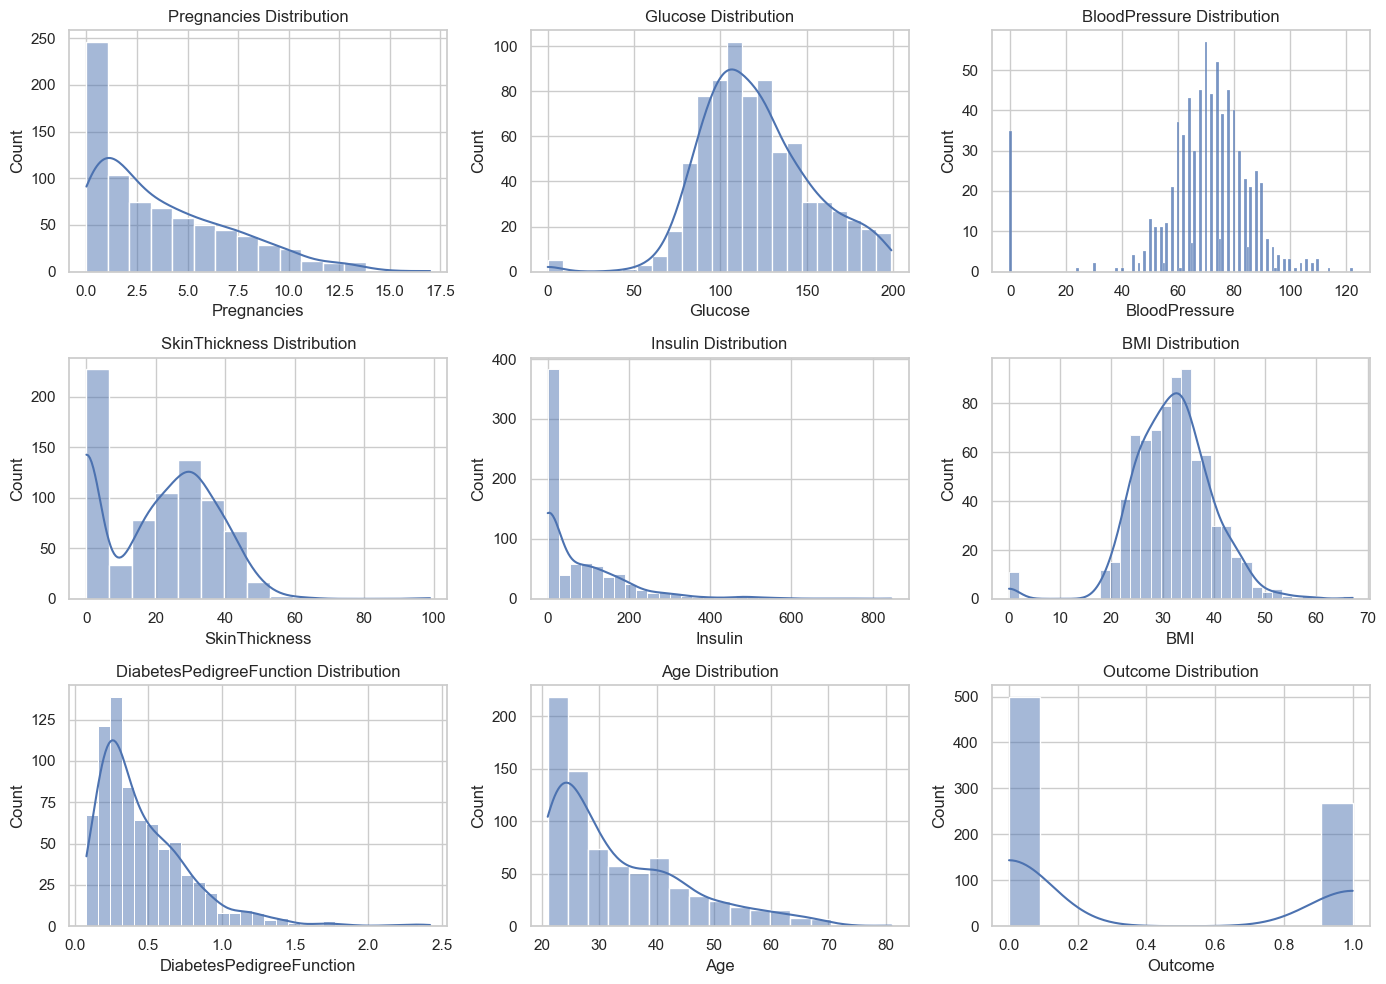

In [18]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(14, 10))

sns.histplot(df['Pregnancies'], kde=True, ax=axes[0, 0]).set(title="Pregnancies Distribution")

sns.histplot(df['Glucose'], kde=True, ax=axes[0, 1]).set(title="Glucose Distribution")

sns.histplot(df['BloodPressure'], discrete=True, ax=axes[0, 2]).set(title="BloodPressure Distribution")

sns.histplot(df['SkinThickness'], kde=True, ax=axes[1, 0]).set(title="SkinThickness Distribution")

sns.histplot(df['Insulin'], kde=True, ax=axes[1, 1]).set(title="Insulin Distribution")

sns.histplot(df['BMI'], kde=True, ax=axes[1, 2]).set(title="BMI Distribution")

sns.histplot(df['DiabetesPedigreeFunction'], kde=True, ax=axes[2, 0]).set(title="DiabetesPedigreeFunction Distribution")

sns.histplot(df['Age'], kde=True, ax=axes[2, 1]).set(title="Age Distribution")

sns.histplot(df['Outcome'], kde=True, ax=axes[2, 2]).set(title="Outcome Distribution")

plt.tight_layout()
plt.show()

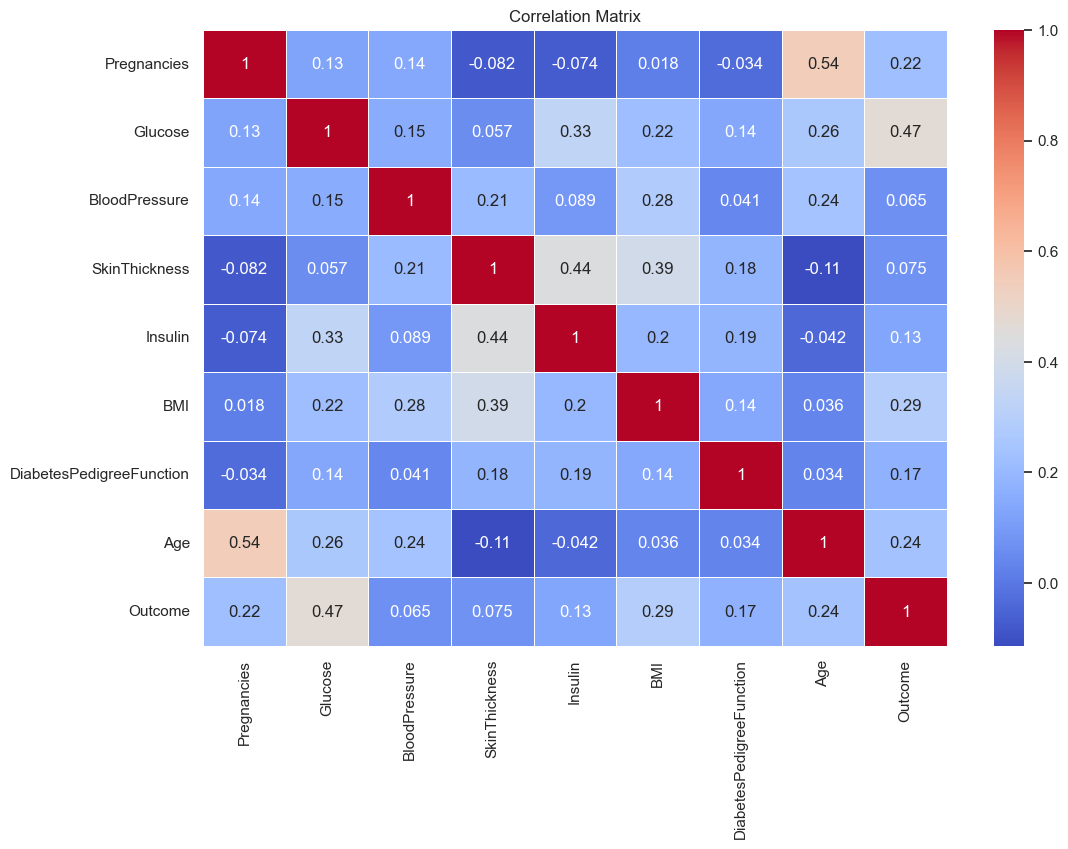

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Preprocessing

In [25]:
def remove_outliers(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.1)
        Q3 = df[col].quantile(0.9)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.35 * IQR
        upper_bound = Q3 + 1.35 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df_clean = remove_outliers(df)

df_clean.shape

(714, 9)

In [27]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
X = df_clean.drop(columns = 'Outcome')
y = df_clean['Outcome']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)

## Cross Validation

In [36]:
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_trains, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"The Best K Value is: {optimal_k} accuracy score is: {max(accuracy_scores)}")

The Best K Value is: 19 accuracy score is: 0.7548283752860412


## Modeling with the best K value

In [39]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_trains, y_train)

KNeighborsClassifier(n_neighbors=19)

In [41]:
y_pred = knn.predict(X_tests)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7832167832167832
Precision: 0.7968254606185642
Recall: 0.7832167832167832
F1 Score: 0.7627683321463227


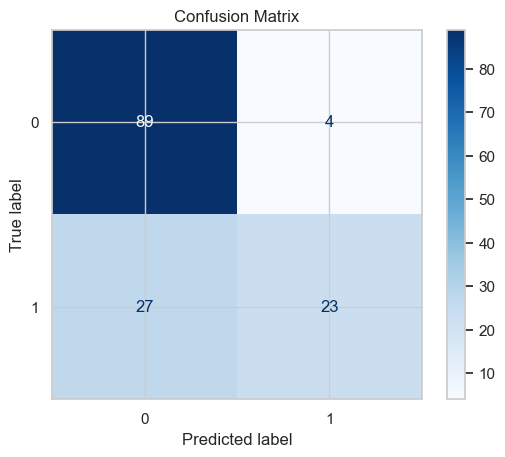

In [45]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# GridSearch

In [48]:
knn1 = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18]}
grid_search = GridSearchCV(estimator=knn1, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trains, y_train)

print("The Best K Value is: ", grid_search.best_params_['n_neighbors'])
print("Accuracy: ", grid_search.best_score_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_tests)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

The Best K Value is:  17
Accuracy:  0.7460869565217392
Test Set Accuracy: 0.7832167832167832


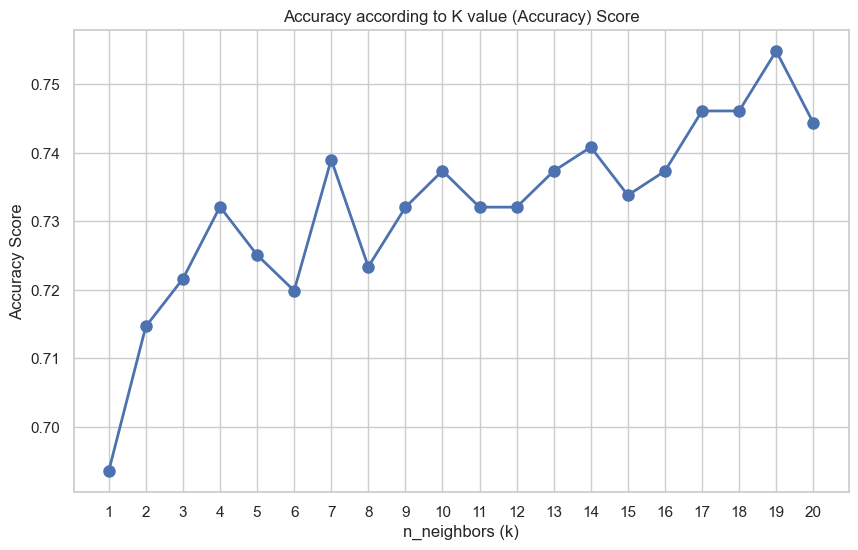

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Accuracy according to K value (Accuracy) Score')
plt.xlabel('n_neighbors (k)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(k_values)
plt.show()